# API Call and Exploratory Data Analysis

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# insert API key here
API_KEY = '1vXKptlEX84OoMidufyRXLtNDSg'

Creating a list of endpoints for the features I am interested in.

In [20]:
urls = ['https://api.glassnode.com/v1/metrics/addresses/count',
'https://api.glassnode.com/v1/metrics/addresses/sending_count',
'https://api.glassnode.com/v1/metrics/addresses/receiving_count',
'https://api.glassnode.com/v1/metrics/addresses/active_count',
'https://api.glassnode.com/v1/metrics/addresses/new_non_zero_count',
'https://api.glassnode.com/v1/metrics/blockchain/block_height',
'https://api.glassnode.com/v1/metrics/indicators/sopr',
'https://api.glassnode.com/v1/metrics/market/price_usd_close',
'https://api.glassnode.com/v1/metrics/market/marketcap_usd',
'https://api.glassnode.com/v1/metrics/mining/difficulty_latest',
'https://api.glassnode.com/v1/metrics/mining/hash_rate_mean']

### Feature Descriptions
|Feature Name|Description|
|------------|-----------|
|count|The total number of unique addresses that ever appeared in a transaction of the native coin in the network.|
|sending_count|The number of unique addresses that were active as a sender of funds. Only addresses that were active as a sender in successful non-zero transfers are counted.|
|receiving_count|The number of unique addresses that were active as a receiver of funds. Only addresses that were active as a receiver in successful non-zero transfers are counted.|
|active_count|The number of unique addresses that were active either as a sender or receiver. Only addresses that were active in successful transactions are counted.|
|new_non_zero_count|The number of unique addresses that appeared for the first time in a transaction of the native coin in the network.|
|block_height|The block height, i.e. the total number of blocks ever created and included in the main blockchain.|
|sopr|The Spent Output Profit Ratio (SOPR) is computed by dividing the realized value (in USD) divided by the value at creation (USD) of a spent output. Or simply: price sold / price paid.|
|price_usd_close|The asset's closing price in USD.|
|marketcap_usd|The market capitalization (or network value) is defined as the product of the current supply by the current USD price.|
|difficulty_latest|The current estimated number of hashes required to mine a block. Note: Bitcoin difficulty is often denoted as the relative difficulty with respect to the genesis block, which required approximately 2^32 hashes. For better comparison across blockchains, our values are denoted in raw hashes.|
|hash_rate_mean|The average estimated number of hashes per second produced by the miners in the network.|

In [4]:
len(urls)

11

In [5]:
data = []
for url in urls:
  label = url.split('/')[-1]
      
  # make API request
  res = requests.get(url, params={'a': 'ETH'
                                  ,'api_key': API_KEY})
  # convert to pandas dataframe
  df = pd.read_json(res.text, convert_dates=['t'])
  df.set_index('t', inplace = True)
  df.rename(columns={'v':label}, inplace=True)
  data.append(df)


In [6]:
## Inspecting one dataframe from list of results
data

[                count
 t                    
 2015-07-30       9203
 2015-07-31       9359
 2015-08-01       9474
 2015-08-02       9561
 2015-08-03       9637
 ...               ...
 2021-09-07  127525454
 2021-09-08  127614096
 2021-09-09  127707457
 2021-09-10  127802200
 2021-09-11  127899284
 
 [2236 rows x 1 columns],
             sending_count
 t                        
 2015-07-30              0
 2015-07-31              0
 2015-08-01              0
 2015-08-02              0
 2015-08-03              0
 ...                   ...
 2021-09-07         236234
 2021-09-08         209233
 2021-09-09         217560
 2021-09-10         252036
 2021-09-11         323971
 
 [2236 rows x 1 columns],
             receiving_count
 t                          
 2015-07-30                0
 2015-07-31                0
 2015-08-01                0
 2015-08-02                0
 2015-08-03                0
 ...                     ...
 2021-09-07           305676
 2021-09-08           288408
 202

In [7]:
# Creating a dataframe from the list of results generated from the API
data_df = pd.concat(data, axis=1)
data_df

,count,sending_count,receiving_count,active_count,new_non_zero_count,block_height,sopr,price_usd_close,marketcap_usd,difficulty_latest,hash_rate_mean
t,,,,,,,,,,,
2015-07-30,9203.0,0.0,0.0,0.0,9203.0,6911.0,NaN,NaN,NaN,3.382792e+11,1.910758e+10
2015-07-31,9359.0,0.0,0.0,0.0,156.0,13774.0,NaN,NaN,NaN,8.231927e+11,4.679999e+10
2015-08-01,9474.0,0.0,0.0,0.0,115.0,19067.0,NaN,NaN,NaN,9.566506e+11,5.421432e+10
2015-08-02,9561.0,0.0,0.0,0.0,87.0,24425.0,NaN,NaN,NaN,1.102546e+12,6.315518e+10
2015-08-03,9637.0,0.0,0.0,0.0,76.0,29705.0,NaN,NaN,NaN,1.154732e+12,6.876058e+10
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08,127614096.0,209233.0,288408.0,476723.0,88642.0,13188217.0,1.030869,3490.893336,4.037077e+11,8.877906e+15,6.629633e+14
2021-09-09,127707457.0,217560.0,290503.0,481475.0,93361.0,13194683.0,1.035343,3428.141046,4.098615e+11,9.039992e+15,6.562142e+14
2021-09-10,127802200.0,252036.0,283405.0,517875.0,94743.0,13201142.0,1.014722,3212.099640,3.949930e+11,9.058536e+15,6.606451e+14


In [8]:
## Generating list of columns with more than 1 missing value
test_list = list(data_df.isna().sum()[data_df.isna().sum() > 1].index)
test_list

['sopr', 'price_usd_close', 'marketcap_usd']

In [9]:
## Looping through list and comparing index values
for i in test_list:
    display(data_df[data_df[i].isna()].index)

DatetimeIndex(['2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02',
               '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06',
               '2021-09-12'],
              dtype='datetime64[ns]', name='t', freq=None)

DatetimeIndex(['2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02',
               '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06',
               '2015-08-07', '2018-04-12', '2018-04-13', '2018-04-14',
               '2018-04-15'],
              dtype='datetime64[ns]', name='t', freq=None)

DatetimeIndex(['2015-07-30', '2015-07-31', '2015-08-01', '2015-08-02',
               '2015-08-03', '2015-08-04', '2015-08-05', '2015-08-06',
               '2015-08-07', '2021-09-12'],
              dtype='datetime64[ns]', name='t', freq=None)

In [10]:
data_df = data_df.dropna(axis=0)#.isna().sum()

In [11]:
data_df

,count,sending_count,receiving_count,active_count,new_non_zero_count,block_height,sopr,price_usd_close,marketcap_usd,difficulty_latest,hash_rate_mean
t,,,,,,,,,,,
2015-08-08,10641.0,582.0,439.0,800.0,353.0,55869.0,0.459823,0.769981,8.983510e+07,1.606016e+12,9.644985e+10
2015-08-09,10894.0,457.0,489.0,731.0,253.0,60992.0,0.403942,0.719830,5.507245e+07,1.741399e+12,1.013969e+11
2015-08-10,11543.0,804.0,749.0,997.0,649.0,66247.0,0.360587,0.700705,4.878861e+07,1.948102e+12,1.116431e+11
2015-08-11,13432.0,2119.0,2106.0,2339.0,1889.0,71527.0,0.614763,1.088361,5.745360e+07,2.171897e+12,1.240757e+11
2015-08-12,13744.0,565.0,673.0,904.0,312.0,76651.0,0.609176,1.214071,8.079017e+07,2.248238e+12,1.308930e+11
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-07,127525454.0,236234.0,305676.0,512946.0,101753.0,13181722.0,1.039874,3423.552440,4.329657e+11,8.709230e+15,6.494343e+14
2021-09-08,127614096.0,209233.0,288408.0,476723.0,88642.0,13188217.0,1.030869,3490.893336,4.037077e+11,8.877906e+15,6.629633e+14
2021-09-09,127707457.0,217560.0,290503.0,481475.0,93361.0,13194683.0,1.035343,3428.141046,4.098615e+11,9.039992e+15,6.562142e+14


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2223 entries, 2015-08-08 to 2021-09-11
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               2223 non-null   float64
 1   sending_count       2223 non-null   float64
 2   receiving_count     2223 non-null   float64
 3   active_count        2223 non-null   float64
 4   new_non_zero_count  2223 non-null   float64
 5   block_height        2223 non-null   float64
 6   sopr                2223 non-null   float64
 7   price_usd_close     2223 non-null   float64
 8   marketcap_usd       2223 non-null   float64
 9   difficulty_latest   2223 non-null   float64
 10  hash_rate_mean      2223 non-null   float64
dtypes: float64(11)
memory usage: 208.4 KB


In [13]:
data_df.to_excel('data/eth_api_data.xlsx')

In [14]:
# Creating a matrix of correlations for each of the features in the dataframe
corr_matrix = data_df.corr()

# Creating a boolean mask for all values on or above the matrix diagonal
corr_matrix_mask = np.triu(np.ones_like(data_df.corr(), dtype=bool));

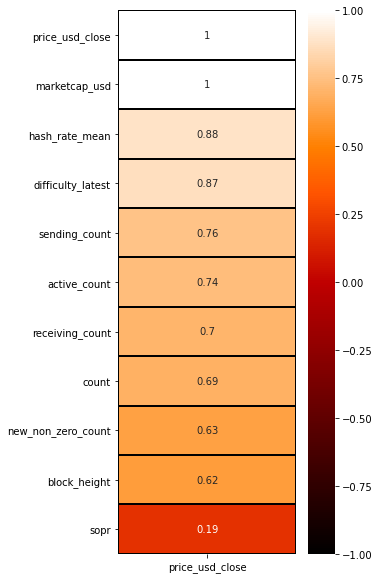

In [15]:
# Quickly looking at how each feature correlates to price
plt.figure(figsize=(4,10))
heatmap = sns.heatmap(data_df.corr()[['price_usd_close']].sort_values(by='price_usd_close', ascending=False), vmin=-1, vmax=1, linewidths=1, linecolor='black', annot=True, fmt='.2g', cmap="gist_heat")

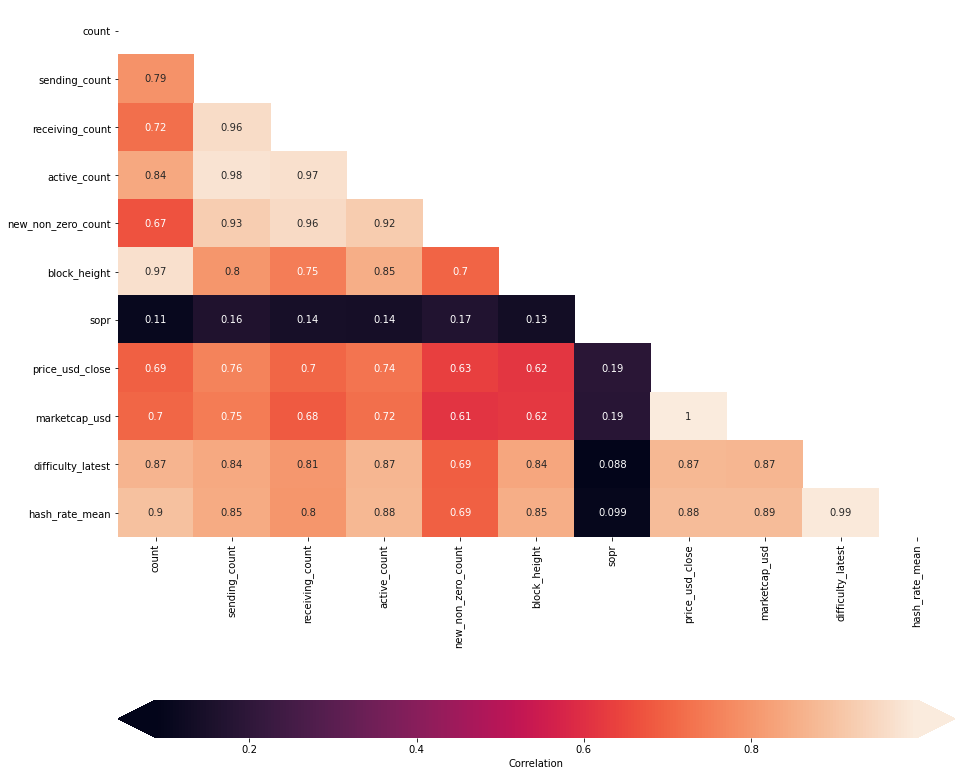

In [17]:
# Creating a heatmap of correlation coefficients
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(
            corr_matrix,
            ax=ax,
            annot=True,
            mask=corr_matrix_mask,
            cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
);

In [18]:
data_df.columns

Index(['count', 'sending_count', 'receiving_count', 'active_count',
       'new_non_zero_count', 'block_height', 'sopr', 'price_usd_close',
       'marketcap_usd', 'difficulty_latest', 'hash_rate_mean'],
      dtype='object')

In [19]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2223 entries, 2015-08-08 to 2021-09-11
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   count               2223 non-null   float64
 1   sending_count       2223 non-null   float64
 2   receiving_count     2223 non-null   float64
 3   active_count        2223 non-null   float64
 4   new_non_zero_count  2223 non-null   float64
 5   block_height        2223 non-null   float64
 6   sopr                2223 non-null   float64
 7   price_usd_close     2223 non-null   float64
 8   marketcap_usd       2223 non-null   float64
 9   difficulty_latest   2223 non-null   float64
 10  hash_rate_mean      2223 non-null   float64
dtypes: float64(11)
memory usage: 208.4 KB
